In [167]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

In [168]:
df= pd.read_csv('Daily+temperature+data.csv')
df.head()

,Date,Temperature(Min)
0,01-01-2017,14.3
1,01-02-2017,17.4
2,01-03-2017,18.5
3,01-04-2017,16.8
4,01-05-2017,11.5


In [173]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              730 non-null    datetime64[ns]
 1   Temperature(Min)  730 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.5 KB


In [174]:
df = df.set_index('Date')
df.head()

,Temperature(Min)
Date,
2017-01-01,14.3
2017-01-02,17.4
2017-01-03,18.5
2017-01-04,16.8
2017-01-05,11.5


In [175]:
df.tail()

,Temperature(Min)
Date,
2018-12-27,14.0
2018-12-28,13.6
2018-12-29,13.5
2018-12-30,15.7
2018-12-31,13.0


In [176]:
df.isnull().sum()

Temperature(Min)    0
dtype: int64

In [177]:
df.shape

(730, 1)

In [178]:
train = df[:511]
test = df[511:]

In [179]:
#simple exponential smoothing
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Temperature(Min)'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(219)

In [180]:
y_hat_ses

,Temperature(Min),ses_forecast
Date,,
2018-05-27,8.2,9.1997
2018-05-28,6.1,9.1997
2018-05-29,4.5,9.1997
2018-05-30,6.1,9.1997
2018-05-31,9.8,9.1997
...,...,...
2018-12-27,14.0,9.1997
2018-12-28,13.6,9.1997
2018-12-29,13.5,9.1997


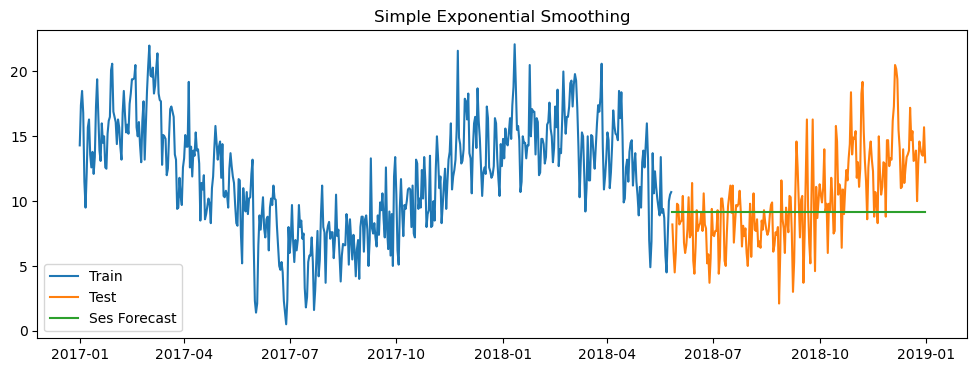

In [181]:
#plotting a graph
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'],label='Train')
plt.plot(test['Temperature(Min)'],label='Test')
plt.plot(y_hat_ses['ses_forecast'],label='Ses Forecast')
plt.title('Simple Exponential Smoothing')
plt.legend(loc='best')
plt.show()

In [182]:
##Calculating the RMSE and MAPE value
from sklearn.metrics import mean_squared_error
rmse = round(np.sqrt(mean_squared_error(test['Temperature(Min)'],y_hat_ses['ses_forecast'])),2)
mape = round(np.mean((np.abs(test['Temperature(Min)']-y_hat_ses['ses_forecast']))/test['Temperature(Min)']*100),2)
print (rmse, mape)

3.56 30.24


### Holt's method of forecasting

In [189]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Temperature(Min)']),trend='additive',seasonal=None)
model_fit = model.fit(smoothing_level=0.5,smoothing_slope=0.01,optimized = False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.5, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 16.039999999999992, 'initial_trend': -0.26545454545454444, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


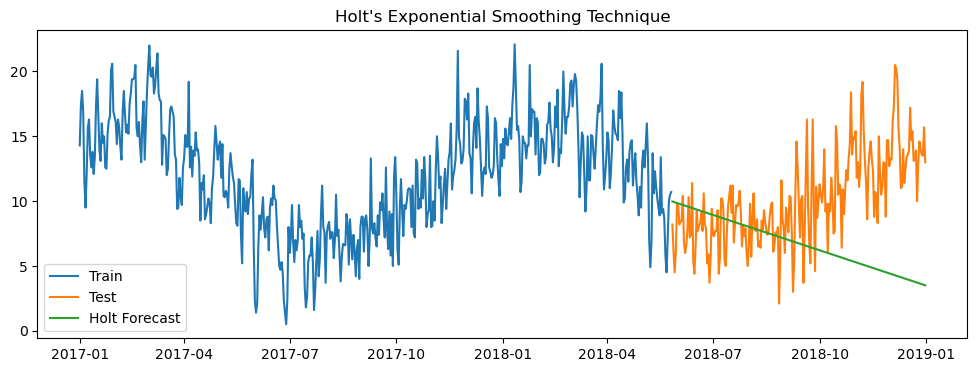

In [190]:
## Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'],label='Train')
plt.plot(test['Temperature(Min)'],label='Test')
plt.plot(y_hat_holt['holt_forecast'],label='Holt Forecast')
plt.title("Holt's Exponential Smoothing Technique")
plt.legend(loc='best')
plt.show()

In [191]:
#rmse and mean
rmse  = round(np.sqrt(mean_squared_error(test['Temperature(Min)'],y_hat_holt['holt_forecast'])),2)
mape = round(np.mean((np.abs(test['Temperature(Min)']-y_hat_holt['holt_forecast']))/test['Temperature(Min)']*100),2)
print('RMSE:',rmse)
print('MAPE:',mape)

RMSE: 5.95
MAPE: 41.94


### Holt winters Additive method

In [195]:
model=ExponentialSmoothing(np.asarray(df['Temperature(Min)']),seasonal_periods=30,trend='add',seasonal=None)
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa = test.copy()
y_hat_hwa['hwa_forecast'] = model_fit.forecast(219)

{'smoothing_level': 0.5399533187976654, 'smoothing_trend': 0.0, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 15.558710097412032, 'initial_trend': -0.002424608884502964, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


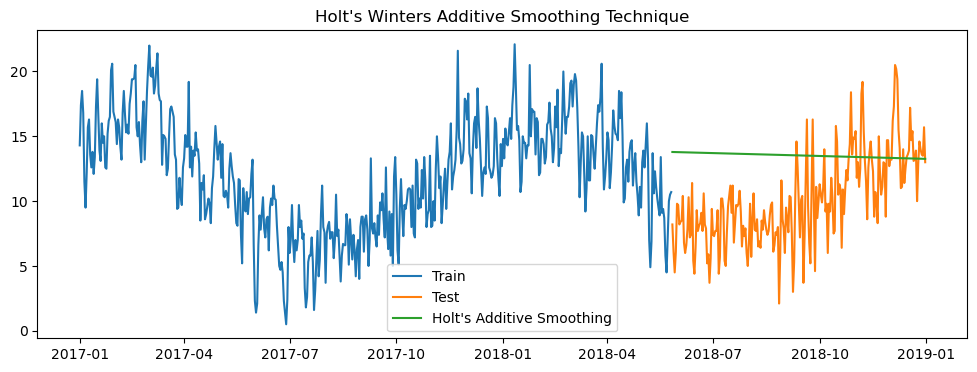

In [196]:
## Plotting train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Temperature(Min)'],label='Train')
plt.plot(test['Temperature(Min)'],label='Test')
plt.plot(y_hat_hwa['hwa_forecast'],label="Holt's Additive Smoothing")
plt.title("Holt's Winters Additive Smoothing Technique")
plt.legend(loc='best')
plt.show()

In [197]:
#rmse and mean
rmse  = round(np.sqrt(mean_squared_error(test['Temperature(Min)'],y_hat_hwa['hwa_forecast'])),2)
mape = round(np.mean((np.abs(test['Temperature(Min)']-y_hat_hwa['hwa_forecast']))/test['Temperature(Min)']*100),2)
print('RMSE:',rmse)
print('MAPE:',mape)

RMSE: 4.92
MAPE: 57.7
